<a href="https://colab.research.google.com/github/lsmanoel/thermo_closed_loop/blob/master/Thermistors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

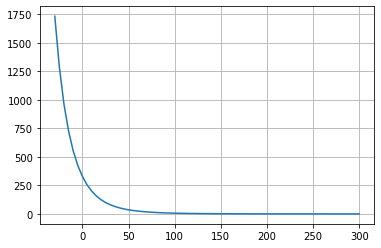

In [89]:
temp_dict = {
    -30:1733.2,
    -25:1283.0,
    -20:959.05,
    -15:724.8,
    -10:551.41,
    -5:423.7,
    0:327.24,
    5:254.8,
    10:199.99,
    15:157.6,
    20:125.245,
    25:100,
    30:81,
    35:65.65,
    40:53.5,
    45:43.78,
    50:35.8999,
    55:29.99,
    60:25,
    65:20.9,
    70:17.55,
    75:14.76,
    80:12.54,
    85:10.66,
    90:9.1,
    95:7.784,
    100:6.71,
    105:5.85,
    110:5.07,
    115:4.41,
    120:3.85,
    125:3.34,
    130:2.94,
    135:2.58,
    140:2.271,
    145:2,
    150:1.7700,
    155:1.589,
    160:1.414,
    165:1.259,
    170:1.122,
    175:0.997,
    180:0.896,
    185:0.797,
    190:0.719,
    195:0.643,
    200:0.582,
    205:0.533,
    210:0.483,
    215:0.437,
    220:0.396,
    225:0.36,
    230:0.328,
    235:0.2993,
    240:0.2934,
    245:0.2690,
    250:0.23,
    255:0.2114,
    260:0.1946,
    265:0.1794,
    270:0.1656,
    275:0.1531,
    280:0.1417,
    285:0.1314,
    290:0.122,
    295:0.1134,
    300:0.1056
 }

T, R_T = zip(*sorted(temp_dict.items()))
plt.plot(T, R_T)
plt.grid(True)

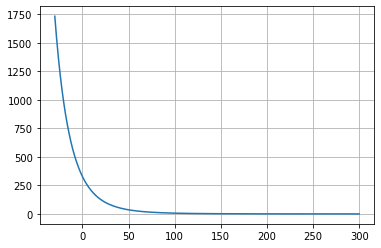

In [90]:
resolution = 2**10
R_T_func = interp1d(T, R_T, kind='cubic')
T_inter = np.linspace(T[0], T[-1], num=resolution, endpoint=True)
plt.plot(T_inter, R_T_func(T_inter))
plt.grid(True)

$$V_T(R_T) = \frac{R_T}{R_T + R}V_{CC}$$

$$R_T(V_T) = R(\frac{V_{CC}}{V_2}-1)$$

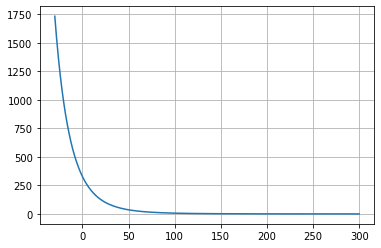

In [101]:
V_CC = 5
R = 10e3

R_T = R_T_func(T_inter)*1e3
V_T = (R_T/(R_T+R))*V_CC
R_T2 = R*(V_T/(V_CC - V_T))/1e3
plt.plot(T_inter, R_T2)
plt.grid(True)

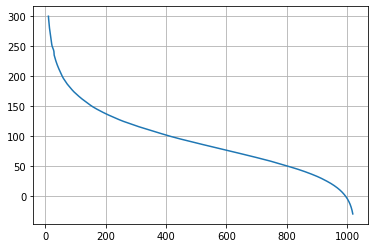

In [111]:
V_ADC = (V_T/5)*1024
plt.plot(V_ADC, T_inter)
plt.grid(True)

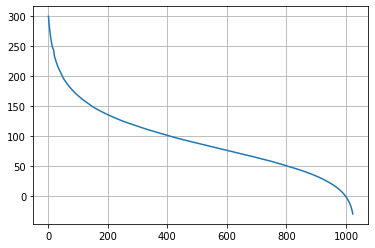

In [134]:
V_ADC_func = interp1d(V_ADC, T_inter, kind='cubic')
ADC =  np.linspace(V_ADC[0], V_ADC[-1], num=resolution, endpoint=True)
T_lin = np.flip(V_ADC_func(ADC))
plt.plot(T_lin)
plt.grid(True)

In [0]:
df = pd.DataFrame({'V_T':T_lin})

df.to_csv('temp_tab.csv', index=False)